In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [6]:
data = pd.read_csv("heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
data.shape

(303, 14)

In [8]:
data.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1  

In [9]:
# print(data.groupby('quality').size())

print(data.groupby("target").size())

target
0    138
1    165
dtype: int64


Text(0.5, 1.0, 'Distribution of age')

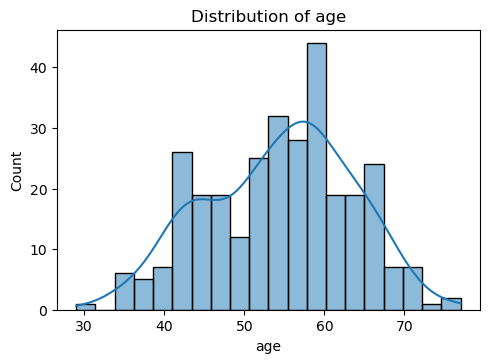

In [10]:

plt.figure(figsize = (12,8))
plt.subplot(2,2,1)
sns.histplot(data['age'],bins = 20, kde = True)
plt.title('Distribution of age')


Text(0.5, 1.0, 'Distribution of Sex')

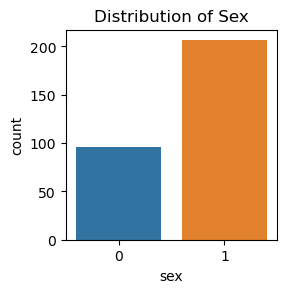

In [13]:
plt.figure(figsize = (6,6))
plt.subplot(2, 2, 2)
sns.countplot(x='sex', data=data)
plt.title('Distribution of Sex')

Text(0.5, 1.0, 'Resting Blood Pressure Distribution')

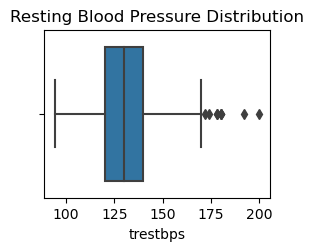

In [15]:
plt.subplot(2, 2, 3)
sns.boxplot(x='trestbps', data=data)
plt.title('Resting Blood Pressure Distribution')

Text(0.5, 1.0, 'Max Heart Rate vs. Age')

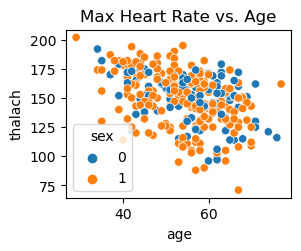

In [17]:
plt.subplot(2, 2, 4)
sns.scatterplot(x='age', y='thalach', data=data, hue='sex')
plt.title('Max Heart Rate vs. Age')

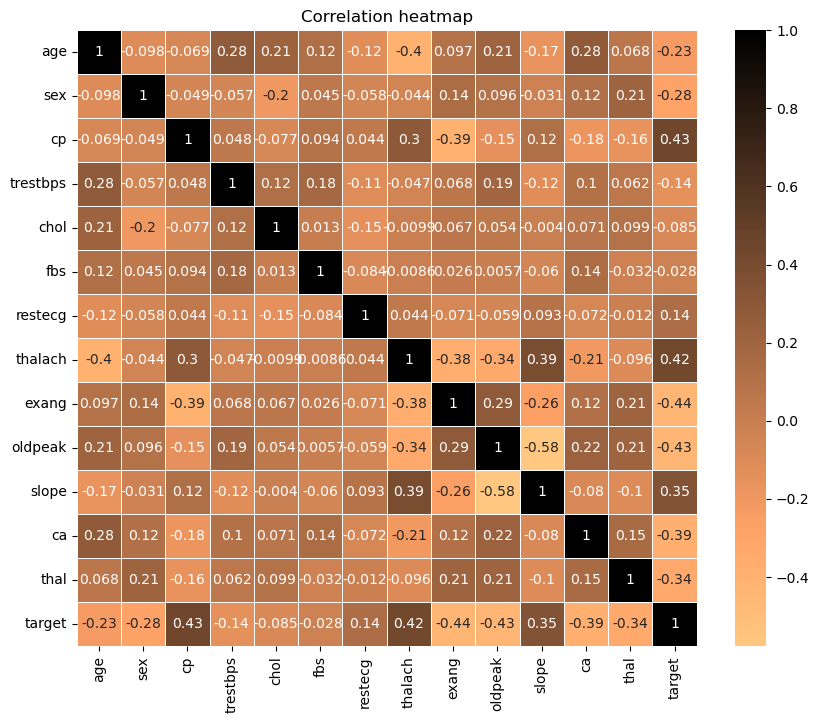

In [24]:

correlation_matrix = data.corr()
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'copper_r',linewidth = 0.5)
plt.title("Correlation heatmap")
plt.show()

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

array = data.values
x = array[:,0:13]
y = array[:,13]

seed = 8
#prepare the models 
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(("NB",GaussianNB()))
models.append(("SVM",SVC()))

#evaluate each model in turn
result = []
names = []
scoring = 'accuracy'
test_size = 0.33
seed = 0

for name,model in models:
    kfold = model_selection.ShuffleSplit(n_splits = 10,test_size = test_size,random_state = seed)
    cv_result = model_selection.cross_val_score(model,x,y,cv = kfold,scoring = scoring)
    result.append(cv_result)
    names.append(name)
    msg = "%s: %f(%f)" % (name,cv_result.mean()*100,cv_result.std())
    print(msg)

C:\Users\sabeeha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sabeeha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

LR: 84.500000(0.025000)
LDA: 84.400000(0.027276)
KNN: 66.900000(0.045266)
CART: 74.600000(0.029394)
NB: 82.000000(0.023238)
SVM: 65.700000(0.044283)


In [29]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
from warnings import simplefilter
simplefilter(action = 'ignore',category = FutureWarning)


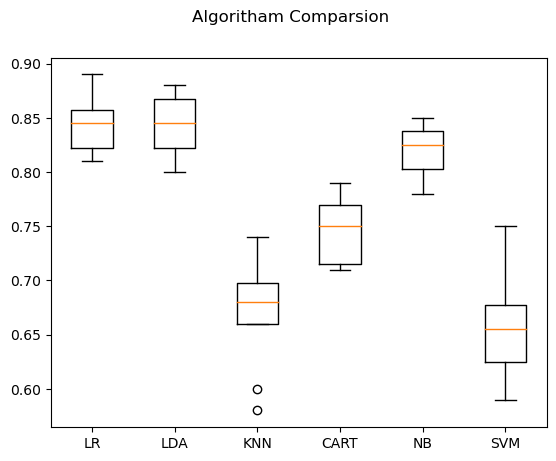

In [30]:
fig = plt.figure()
fig.suptitle('Algoritham Comparsion')
ax = fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

array = data.values
x = array[:,0:13]
y = array[:,13]

# Create a pipeline with scaling and Logistic Regression
lr_pipeline = Pipeline([("Scaler", StandardScaler()),("LR", LogisticRegression())])
lr_pipeline = Pipeline([("Scaler", StandardScaler()),("LDA",LinearDiscriminantAnalysis())])
lr_pipeline = Pipeline([("Scaler", StandardScaler()),("KNN",KNeighborsClassifier())])
lr_pipeline = Pipeline([("Scaler", StandardScaler()),("CART",DecisionTreeClassifier())])
lr_pipeline = Pipeline([("Scaler", StandardScaler()),("NB",GaussianNB())])
lr_pipeline = Pipeline([("Scaler", StandardScaler()),("SVM",SVC())])
result = []
# result = []
names = []
scoring = 'accuracy'
test_size = 0.44
seed = 0

for name,model in models:
    kfold = model_selection.ShuffleSplit(n_splits = 10,test_size = test_size,random_state = seed)
    cv_result = model_selection.cross_val_score(model,x,y,cv = kfold,scoring = scoring)
    result.append(cv_result)
    names.append(name)
    msg = "%s: %f(%f)" % (name,cv_result.mean()*100,cv_result.std())
    print(msg)

C:\Users\sabeeha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sabeeha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

LR: 83.358209(0.016704)
LDA: 83.208955(0.020369)
KNN: 65.671642(0.039770)
CART: 75.746269(0.026119)
NB: 80.522388(0.018716)
SVM: 64.179104(0.042215)


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

Scaler = StandardScaler().fit(x)
rescaledX = Scaler.transform(x)
neighbors = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
param_grid = dict(n_neighbors=neighbors)  # Use the correct parameter name

model = KNeighborsClassifier()
kfold = model_selection.ShuffleSplit(n_splits=10, test_size=test_size, random_state=seed)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.829104 using {'n_neighbors': 19}


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

Scaler = StandardScaler().fit(x)
rescaledX = Scaler.transform(x)
c_values = [0.1,0.3,0.5,6.7,0.9,1.0,1.3,1.5,1.7,2.0]
kernal_values = ['linear','pdy','rbf','signoid']
param_grid = dict(C = c_values,kernal = kernal_values)
model = SVC()
kfold = model_selection.ShuffleSplit(n_splits = 10,test_size = test_size,random_state = seed)
grid = GridSearchCV(estimator = model,param_grid = param_grid,scoring = scoring,cv = kfold)
# grid_result = grid.fit(rescaledX,y)
print('Best: %f using %s'%(grid_result.best_score_,grid_result.best_params_))

Best: 0.829104 using {'n_neighbors': 19}


AB : 0.641791(0.042215) 
GBM : 0.641791(0.042215) 
RR : 0.641791(0.042215) 
ET : 0.641791(0.042215) 


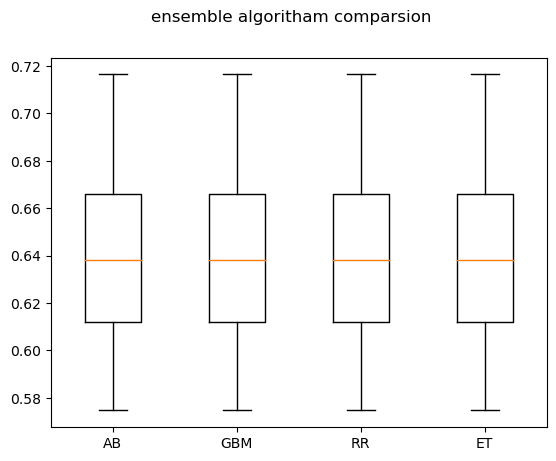

In [37]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn import model_selection


ensembles = []
ensembles.append(('AB',AdaBoostClassifier()))
ensembles.append(('GBM',GradientBoostingClassifier()))
ensembles.append(('RR',RandomForestClassifier()))
ensembles.append(('ET',ExtraTreesClassifier()))
result = []
names = []
for name, modle in ensembles:
    kfold = model_selection.ShuffleSplit(n_splits = 10,test_size = test_size, random_state = seed)
    cv_results = model_selection.cross_val_score(model, x,y,cv = kfold,scoring = scoring)
    result.append(cv_result)
    names.append(name)
    msg = "%s : %f(%f) " %(name,cv_result.mean(),cv_result.std())
    print(msg)

fig = plt.figure()
fig.suptitle('ensemble algoritham comparsion')
ax = fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()

In [38]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn import model_selection

array = data.values
X = array[:, 0:13]  
Y = array[:, 13]    

seed = 8
# prepare the models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))  # Make sure the import is correct
models.append(('RR', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

# evaluate each model in turn
result = []
names = []
scoring = 'accuracy'
test_size = 0.33
seed = 0

for name, model in models:
    kfold = model_selection.ShuffleSplit(n_splits=10, test_size=test_size, random_state=seed)
    cv_result = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    result.append(cv_result)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_result.mean() * 100, cv_result.std())
    print(msg)


C:\Users\sabeeha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sabeeha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

LR: 84.500000 (0.025000)
LDA: 84.400000 (0.027276)
KNN: 66.900000 (0.045266)
CART: 74.300000 (0.031000)
NB: 82.000000 (0.023238)
SVM: 65.700000 (0.044283)
AB: 80.100000 (0.031129)
GBM: 81.500000 (0.024597)
RR: 83.500000 (0.027295)
ET: 84.300000 (0.022825)


In [40]:
scaler = StandardScaler().fit(x);
rescaledx = scaler.transform(x)
model = LinearDiscriminantAnalysis()
model.fit(rescaledx,y)

LinearDiscriminantAnalysis()

In [41]:
rescaledvalidationX = Scaler.transform(X)
predictions =  model.predict(rescaledvalidationX)


In [42]:
print(accuracy_score(y,predictions))

0.8415841584158416


In [43]:
print(confusion_matrix(Y,predictions))


[[102  36]
 [ 12 153]]


In [44]:
print(classification_report(Y,predictions))

              precision    recall  f1-score   support

         0.0       0.89      0.74      0.81       138
         1.0       0.81      0.93      0.86       165

    accuracy                           0.84       303
   macro avg       0.85      0.83      0.84       303
weighted avg       0.85      0.84      0.84       303

